# Heat Equation on the Unit Square using Galerkin Finite Element Method for the Spatial Discretization 

Solves the heat equation $\frac{\partial \, u(x,y,t)}{\partial t} = \bigtriangleup u = f$ on the unit square domain $\Omega=(0.,1.0)^2$ supplied with the homogeneous Dirichlet boundary condition $u = 0$ on $\Gamma$. The computational domain is kept simple on purpose for illustration purposes.

This notebook ought to be extended with 
1. a configuration for coil-yoke-air assuming linear magnetic material (constant magnetic permeability) and assuming the yoke to be more conductive thaqt air and coil;
2. a configuration for coil-yoke-air assuming non-linear magnetic material (magnetic saturation);

## Import Packages

In [2]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
using SparseArrays 
using DifferentialEquations
using Plots
using LaTeXStrings

## Section 1: Geometry and Mesh Generation of Unit Square Geometry 
The code that follows performs <b>geometry generation</b> and <b>mesh generation</b> on the unit square geometry. 

In [3]:
#..1/4: initialize gmsh 
gmsh.initialize()

#..2/4: generate geometry 
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("square")
#..set mesh density parameter 
lc = .2e-1
#..define four points via (x,y,z) coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
#..define four edges by connecting point labels pairwise  
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
#..define curved loop by connecting four edge labels  
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
#..define surface by curved loop 
gmsh.model.geo.addPlaneSurface([1], 1)
#..give label to the surface 
#..syntax of the function being used is gmsh.model.setPhysicalName(dim, tag, name) 
gmsh.model.setPhysicalName(2, 1, "My surface")
#..synchronize model 
gmsh.model.geo.synchronize()

#..3/4: generate two-dimensional mesh 
gmsh.model.mesh.generate(2)
#..if true, write mesh to file for further processing 
if (true) gmsh.write("square.msh") end 
#..if true, visualize mesh through the GUI 
if (false) gmsh.fltk.run() end 

#..4/4: finalize gmsh 
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000699375s, CPU 0.000234s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0540699s, CPU 0.051097s)
Info    : 3014 nodes 6030 elements
Info    : Writing 'square.msh'...
Info    : Done writing 'square.msh'


## Section 2:/ Read Mesh from file and perform loop over the elements 
Exercise: 
- verify that sum of area of elements over mesh equals area of entire 2D domain;

In [4]:
#..1/4: Finalize gmsh
gmsh.initialize()

#..2/4: Read mesh from file
gmsh.open("square.msh")

#..3/4: perform loop over the elemements 
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])
  
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println(" ")

end 

#..4/4: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'
on element 1 node-1 has global number 2886
on element 1 node-2 has global number 1735
on element 1 node-3 has global number 2998
 
on element 2 node-1 has global number 1560
on element 2 node-2 has global number 1921
on element 2 node-3 has global number 1946
 
on element 3 node-1 has global number 1857
on element 3 node-2 has global number 235
on element 3 node-3 has global number 2024
 
on element 4 node-1 has global number 226
on element 4 node-2 has global number 2886
on element 4 node-3 has global number 2998
 
on element 5 node-1 has global number 2884
on element 5 node-2 has global number 2257
on element 5 node-3 has global number 2999
 
on element 6 node-1 has global number 2053
on element 6 node-2 has global number 1343
on element 6 node-3 has global number 2512
 
on element 7 node-1 has global number 2024
on element 7 node-2 has global number

on element 77 node-1 has global number 166
on element 77 node-2 has global number 167
on element 77 node-3 has global number 1764
 
on element 78 node-1 has global number 192
on element 78 node-2 has global number 193
on element 78 node-3 has global number 1765
 
on element 79 node-1 has global number 73
on element 79 node-2 has global number 74
on element 79 node-3 has global number 2143
 
on element 80 node-1 has global number 250
on element 80 node-2 has global number 1988
on element 80 node-3 has global number 1989
 
on element 81 node-1 has global number 1962
on element 81 node-2 has global number 251
on element 81 node-3 has global number 1964
 
on element 82 node-1 has global number 80
on element 82 node-2 has global number 81
on element 82 node-3 has global number 1767
 
on element 83 node-1 has global number 2894
on element 83 node-2 has global number 1318
on element 83 node-3 has global number 2903
 
on element 84 node-1 has global number 227
on element 84 node-2 has global n

on element 152 node-3 has global number 2964
 
on element 153 node-1 has global number 2858
on element 153 node-2 has global number 2107
on element 153 node-3 has global number 2980
 
on element 154 node-1 has global number 1995
on element 154 node-2 has global number 1193
on element 154 node-3 has global number 2885
 
on element 155 node-1 has global number 1994
on element 155 node-2 has global number 1993
on element 155 node-3 has global number 2881
 
on element 156 node-1 has global number 1990
on element 156 node-2 has global number 1989
on element 156 node-3 has global number 1991
 
on element 157 node-1 has global number 1762
on element 157 node-2 has global number 1763
on element 157 node-3 has global number 1768
 
on element 158 node-1 has global number 266
on element 158 node-2 has global number 1760
on element 158 node-3 has global number 2991
 
on element 159 node-1 has global number 2897
on element 159 node-2 has global number 1731
on element 159 node-3 has global number 28

on element 227 node-3 has global number 2732
 
on element 228 node-1 has global number 1614
on element 228 node-2 has global number 2034
on element 228 node-3 has global number 2801
 
on element 229 node-1 has global number 225
on element 229 node-2 has global number 1770
on element 229 node-3 has global number 2845
 
on element 230 node-1 has global number 686
on element 230 node-2 has global number 684
on element 230 node-3 has global number 2849
 
on element 231 node-1 has global number 727
on element 231 node-2 has global number 725
on element 231 node-3 has global number 2199
 
on element 232 node-1 has global number 688
on element 232 node-2 has global number 690
on element 232 node-3 has global number 1832
 
on element 233 node-1 has global number 2845
on element 233 node-2 has global number 1770
on element 233 node-3 has global number 2848
 
on element 234 node-1 has global number 225
on element 234 node-2 has global number 2820
on element 234 node-3 has global number 2834
 
on

on element 303 node-1 has global number 233
on element 303 node-2 has global number 1798
on element 303 node-3 has global number 2721
 
on element 304 node-1 has global number 691
on element 304 node-2 has global number 1780
on element 304 node-3 has global number 1882
 
on element 305 node-1 has global number 691
on element 305 node-2 has global number 688
on element 305 node-3 has global number 1832
 
on element 306 node-1 has global number 1780
on element 306 node-2 has global number 691
on element 306 node-3 has global number 1832
 
on element 307 node-1 has global number 1388
on element 307 node-2 has global number 1387
on element 307 node-3 has global number 1845
 
on element 308 node-1 has global number 1256
on element 308 node-2 has global number 2116
on element 308 node-3 has global number 2117
 
on element 309 node-1 has global number 707
on element 309 node-2 has global number 704
on element 309 node-3 has global number 1858
 
on element 310 node-1 has global number 703
on e

on element 429 node-3 has global number 2347
 
on element 430 node-1 has global number 975
on element 430 node-2 has global number 1241
on element 430 node-3 has global number 2379
 
on element 431 node-1 has global number 1241
on element 431 node-2 has global number 2378
on element 431 node-3 has global number 2379
 
on element 432 node-1 has global number 1810
on element 432 node-2 has global number 2091
on element 432 node-3 has global number 2347
 
on element 433 node-1 has global number 2041
on element 433 node-2 has global number 790
on element 433 node-3 has global number 2744
 
on element 434 node-1 has global number 179
on element 434 node-2 has global number 235
on element 434 node-3 has global number 1857
 
on element 435 node-1 has global number 2039
on element 435 node-2 has global number 2612
on element 435 node-3 has global number 2681
 
on element 436 node-1 has global number 1536
on element 436 node-2 has global number 1883
on element 436 node-3 has global number 2149


on element 505 node-1 has global number 2189
on element 505 node-2 has global number 1111
on element 505 node-3 has global number 2276
 
on element 506 node-1 has global number 1784
on element 506 node-2 has global number 1792
on element 506 node-3 has global number 2030
 
on element 507 node-1 has global number 1167
on element 507 node-2 has global number 323
on element 507 node-3 has global number 1897
 
on element 508 node-1 has global number 2042
on element 508 node-2 has global number 2039
on element 508 node-3 has global number 2790
 
on element 509 node-1 has global number 1121
on element 509 node-2 has global number 1007
on element 509 node-3 has global number 2772
 
on element 510 node-1 has global number 1798
on element 510 node-2 has global number 233
on element 510 node-3 has global number 2732
 
on element 511 node-1 has global number 1192
on element 511 node-2 has global number 1833
on element 511 node-3 has global number 2596
 
on element 512 node-1 has global number 191

on element 580 node-1 has global number 734
on element 580 node-2 has global number 1064
on element 580 node-3 has global number 2234
 
on element 581 node-1 has global number 2556
on element 581 node-2 has global number 555
on element 581 node-3 has global number 2645
 
on element 582 node-1 has global number 1064
on element 582 node-2 has global number 732
on element 582 node-3 has global number 2165
 
on element 583 node-1 has global number 1849
on element 583 node-2 has global number 1886
on element 583 node-3 has global number 2483
 
on element 584 node-1 has global number 2239
on element 584 node-2 has global number 2296
on element 584 node-3 has global number 2799
 
on element 585 node-1 has global number 2162
on element 585 node-2 has global number 2160
on element 585 node-3 has global number 2170
 
on element 586 node-1 has global number 979
on element 586 node-2 has global number 2770
on element 586 node-3 has global number 2773
 
on element 587 node-1 has global number 808
o

on element 655 node-2 has global number 651
on element 655 node-3 has global number 2602
 
on element 656 node-1 has global number 1397
on element 656 node-2 has global number 2236
on element 656 node-3 has global number 2805
 
on element 657 node-1 has global number 2380
on element 657 node-2 has global number 1241
on element 657 node-3 has global number 2724
 
on element 658 node-1 has global number 277
on element 658 node-2 has global number 201
on element 658 node-3 has global number 278
 
on element 659 node-1 has global number 2203
on element 659 node-2 has global number 2202
on element 659 node-3 has global number 2797
 
on element 660 node-1 has global number 1874
on element 660 node-2 has global number 782
on element 660 node-3 has global number 2718
 
on element 661 node-1 has global number 1479
on element 661 node-2 has global number 2040
on element 661 node-3 has global number 2640
 
on element 662 node-1 has global number 2203
on element 662 node-2 has global number 2797
o

on element 730 node-3 has global number 1856
 
on element 731 node-1 has global number 1466
on element 731 node-2 has global number 2036
on element 731 node-3 has global number 2517
 
on element 732 node-1 has global number 2194
on element 732 node-2 has global number 554
on element 732 node-3 has global number 2195
 
on element 733 node-1 has global number 2010
on element 733 node-2 has global number 1169
on element 733 node-3 has global number 2231
 
on element 734 node-1 has global number 2036
on element 734 node-2 has global number 1638
on element 734 node-3 has global number 2517
 
on element 735 node-1 has global number 2149
on element 735 node-2 has global number 1165
on element 735 node-3 has global number 2531
 
on element 736 node-1 has global number 1142
on element 736 node-2 has global number 2161
on element 736 node-3 has global number 2163
 
on element 737 node-1 has global number 559
on element 737 node-2 has global number 2075
on element 737 node-3 has global number 208

on element 826 node-3 has global number 2185
 
on element 827 node-1 has global number 1010
on element 827 node-2 has global number 1945
on element 827 node-3 has global number 2271
 
on element 828 node-1 has global number 470
on element 828 node-2 has global number 2826
on element 828 node-3 has global number 2827
 
on element 829 node-1 has global number 2195
on element 829 node-2 has global number 2197
on element 829 node-3 has global number 2502
 
on element 830 node-1 has global number 1959
on element 830 node-2 has global number 274
on element 830 node-3 has global number 1960
 
on element 831 node-1 has global number 1293
on element 831 node-2 has global number 1691
on element 831 node-3 has global number 2724
 
on element 832 node-1 has global number 1564
on element 832 node-2 has global number 1566
on element 832 node-3 has global number 1947
 
on element 833 node-1 has global number 132
on element 833 node-2 has global number 133
on element 833 node-3 has global number 1907


on element 902 node-1 has global number 1967
on element 902 node-2 has global number 2217
on element 902 node-3 has global number 2405
 
on element 903 node-1 has global number 248
on element 903 node-2 has global number 155
on element 903 node-3 has global number 1918
 
on element 904 node-1 has global number 1638
on element 904 node-2 has global number 2035
on element 904 node-3 has global number 2153
 
on element 905 node-1 has global number 1890
on element 905 node-2 has global number 203
on element 905 node-3 has global number 2450
 
on element 906 node-1 has global number 1339
on element 906 node-2 has global number 1633
on element 906 node-3 has global number 1945
 
on element 907 node-1 has global number 1144
on element 907 node-2 has global number 2123
on element 907 node-3 has global number 2125
 
on element 908 node-1 has global number 209
on element 908 node-2 has global number 134
on element 908 node-3 has global number 1974
 
on element 909 node-1 has global number 1936
o

on element 977 node-1 has global number 1934
on element 977 node-2 has global number 637
on element 977 node-3 has global number 2440
 
on element 978 node-1 has global number 91
on element 978 node-2 has global number 255
on element 978 node-3 has global number 2032
 
on element 979 node-1 has global number 1014
on element 979 node-2 has global number 1095
on element 979 node-3 has global number 1997
 
on element 980 node-1 has global number 277
on element 980 node-2 has global number 278
on element 980 node-3 has global number 1492
 
on element 981 node-1 has global number 1563
on element 981 node-2 has global number 1797
on element 981 node-3 has global number 2447
 
on element 982 node-1 has global number 1691
on element 982 node-2 has global number 2045
on element 982 node-3 has global number 2046
 
on element 983 node-1 has global number 643
on element 983 node-2 has global number 2067
on element 983 node-3 has global number 2674
 
on element 984 node-1 has global number 1559
on 

on element 1051 node-2 has global number 618
on element 1051 node-3 has global number 621
 
on element 1052 node-1 has global number 634
on element 1052 node-2 has global number 650
on element 1052 node-3 has global number 651
 
on element 1053 node-1 has global number 1230
on element 1053 node-2 has global number 1346
on element 1053 node-3 has global number 2024
 
on element 1054 node-1 has global number 1550
on element 1054 node-2 has global number 1646
on element 1054 node-3 has global number 2067
 
on element 1055 node-1 has global number 2174
on element 1055 node-2 has global number 2173
on element 1055 node-3 has global number 2269
 
on element 1056 node-1 has global number 2375
on element 1056 node-2 has global number 565
on element 1056 node-3 has global number 2618
 
on element 1057 node-1 has global number 2075
on element 1057 node-2 has global number 559
on element 1057 node-3 has global number 2627
 
on element 1058 node-1 has global number 750
on element 1058 node-2 has g

on element 1125 node-1 has global number 1212
on element 1125 node-2 has global number 1211
on element 1125 node-3 has global number 1213
 
on element 1126 node-1 has global number 219
on element 1126 node-2 has global number 188
on element 1126 node-3 has global number 2054
 
on element 1127 node-1 has global number 1846
on element 1127 node-2 has global number 1615
on element 1127 node-3 has global number 2072
 
on element 1128 node-1 has global number 810
on element 1128 node-2 has global number 2101
on element 1128 node-3 has global number 2301
 
on element 1129 node-1 has global number 236
on element 1129 node-2 has global number 97
on element 1129 node-3 has global number 2051
 
on element 1130 node-1 has global number 1209
on element 1130 node-2 has global number 1211
on element 1130 node-3 has global number 1212
 
on element 1131 node-1 has global number 1595
on element 1131 node-2 has global number 1587
on element 1131 node-3 has global number 1734
 
on element 1132 node-1 has

on element 1218 node-3 has global number 636
 
on element 1219 node-1 has global number 1568
on element 1219 node-2 has global number 1313
on element 1219 node-3 has global number 2127
 
on element 1220 node-1 has global number 2433
on element 1220 node-2 has global number 2152
on element 1220 node-3 has global number 2619
 
on element 1221 node-1 has global number 142
on element 1221 node-2 has global number 143
on element 1221 node-3 has global number 225
 
on element 1222 node-1 has global number 1888
on element 1222 node-2 has global number 1889
on element 1222 node-3 has global number 1891
 
on element 1223 node-1 has global number 795
on element 1223 node-2 has global number 796
on element 1223 node-3 has global number 797
 
on element 1224 node-1 has global number 801
on element 1224 node-2 has global number 799
on element 1224 node-3 has global number 1189
 
on element 1225 node-1 has global number 2103
on element 1225 node-2 has global number 1098
on element 1225 node-3 has gl

on element 1292 node-3 has global number 552
 
on element 1293 node-1 has global number 1793
on element 1293 node-2 has global number 1756
on element 1293 node-3 has global number 2008
 
on element 1294 node-1 has global number 1458
on element 1294 node-2 has global number 1457
on element 1294 node-3 has global number 1459
 
on element 1295 node-1 has global number 50
on element 1295 node-2 has global number 51
on element 1295 node-3 has global number 246
 
on element 1296 node-1 has global number 592
on element 1296 node-2 has global number 579
on element 1296 node-3 has global number 2131
 
on element 1297 node-1 has global number 838
on element 1297 node-2 has global number 2140
on element 1297 node-3 has global number 2144
 
on element 1298 node-1 has global number 338
on element 1298 node-2 has global number 336
on element 1298 node-3 has global number 2279
 
on element 1299 node-1 has global number 1040
on element 1299 node-2 has global number 1105
on element 1299 node-3 has glob

on element 1366 node-3 has global number 2306
 
on element 1367 node-1 has global number 1487
on element 1367 node-2 has global number 2325
on element 1367 node-3 has global number 2326
 
on element 1368 node-1 has global number 2069
on element 1368 node-2 has global number 861
on element 1368 node-3 has global number 2340
 
on element 1369 node-1 has global number 356
on element 1369 node-2 has global number 354
on element 1369 node-3 has global number 2044
 
on element 1370 node-1 has global number 2247
on element 1370 node-2 has global number 1653
on element 1370 node-3 has global number 2489
 
on element 1371 node-1 has global number 819
on element 1371 node-2 has global number 752
on element 1371 node-3 has global number 2035
 
on element 1372 node-1 has global number 1130
on element 1372 node-2 has global number 1129
on element 1372 node-3 has global number 1202
 
on element 1373 node-1 has global number 1207
on element 1373 node-2 has global number 1208
on element 1373 node-3 ha

on element 1440 node-3 has global number 749
 
on element 1441 node-1 has global number 737
on element 1441 node-2 has global number 739
on element 1441 node-3 has global number 2275
 
on element 1442 node-1 has global number 382
on element 1442 node-2 has global number 377
on element 1442 node-3 has global number 383
 
on element 1443 node-1 has global number 786
on element 1443 node-2 has global number 783
on element 1443 node-3 has global number 2245
 
on element 1444 node-1 has global number 2152
on element 1444 node-2 has global number 2222
on element 1444 node-3 has global number 2297
 
on element 1445 node-1 has global number 795
on element 1445 node-2 has global number 798
on element 1445 node-3 has global number 2094
 
on element 1446 node-1 has global number 1374
on element 1446 node-2 has global number 1589
on element 1446 node-3 has global number 1606
 
on element 1447 node-1 has global number 104
on element 1447 node-2 has global number 105
on element 1447 node-3 has globa

on element 1514 node-3 has global number 2147
 
on element 1515 node-1 has global number 2667
on element 1515 node-2 has global number 917
on element 1515 node-3 has global number 2675
 
on element 1516 node-1 has global number 795
on element 1516 node-2 has global number 797
on element 1516 node-3 has global number 798
 
on element 1517 node-1 has global number 783
on element 1517 node-2 has global number 782
on element 1517 node-3 has global number 2245
 
on element 1518 node-1 has global number 830
on element 1518 node-2 has global number 828
on element 1518 node-3 has global number 2110
 
on element 1519 node-1 has global number 938
on element 1519 node-2 has global number 940
on element 1519 node-3 has global number 1079
 
on element 1520 node-1 has global number 46
on element 1520 node-2 has global number 47
on element 1520 node-3 has global number 2128
 
on element 1521 node-1 has global number 384
on element 1521 node-2 has global number 385
on element 1521 node-3 has global nu

on element 1627 node-1 has global number 180
on element 1627 node-2 has global number 181
on element 1627 node-3 has global number 1909
 
on element 1628 node-1 has global number 2138
on element 1628 node-2 has global number 1097
on element 1628 node-3 has global number 2139
 
on element 1629 node-1 has global number 1312
on element 1629 node-2 has global number 1513
on element 1629 node-3 has global number 2127
 
on element 1630 node-1 has global number 530
on element 1630 node-2 has global number 532
on element 1630 node-3 has global number 533
 
on element 1631 node-1 has global number 43
on element 1631 node-2 has global number 44
on element 1631 node-3 has global number 2090
 
on element 1632 node-1 has global number 961
on element 1632 node-2 has global number 1092
on element 1632 node-3 has global number 2359
 
on element 1633 node-1 has global number 820
on element 1633 node-2 has global number 819
on element 1633 node-3 has global number 821
 
on element 1634 node-1 has global

on element 1701 node-1 has global number 491
on element 1701 node-2 has global number 505
on element 1701 node-3 has global number 2237
 
on element 1702 node-1 has global number 738
on element 1702 node-2 has global number 1066
on element 1702 node-3 has global number 2260
 
on element 1703 node-1 has global number 475
on element 1703 node-2 has global number 478
on element 1703 node-3 has global number 2223
 
on element 1704 node-1 has global number 1298
on element 1704 node-2 has global number 1707
on element 1704 node-3 has global number 2166
 
on element 1705 node-1 has global number 40
on element 1705 node-2 has global number 41
on element 1705 node-3 has global number 220
 
on element 1706 node-1 has global number 533
on element 1706 node-2 has global number 534
on element 1706 node-3 has global number 535
 
on element 1707 node-1 has global number 1160
on element 1707 node-2 has global number 368
on element 1707 node-3 has global number 2391
 
on element 1708 node-1 has global 

on element 1775 node-1 has global number 805
on element 1775 node-2 has global number 758
on element 1775 node-3 has global number 822
 
on element 1776 node-1 has global number 673
on element 1776 node-2 has global number 672
on element 1776 node-3 has global number 674
 
on element 1777 node-1 has global number 1227
on element 1777 node-2 has global number 1052
on element 1777 node-3 has global number 1387
 
on element 1778 node-1 has global number 1424
on element 1778 node-2 has global number 1927
on element 1778 node-3 has global number 2655
 
on element 1779 node-1 has global number 2383
on element 1779 node-2 has global number 839
on element 1779 node-3 has global number 2474
 
on element 1780 node-1 has global number 475
on element 1780 node-2 has global number 477
on element 1780 node-3 has global number 478
 
on element 1781 node-1 has global number 513
on element 1781 node-2 has global number 515
on element 1781 node-3 has global number 1082
 
on element 1782 node-1 has globa

on element 1849 node-1 has global number 394
on element 1849 node-2 has global number 432
on element 1849 node-3 has global number 433
 
on element 1850 node-1 has global number 484
on element 1850 node-2 has global number 486
on element 1850 node-3 has global number 487
 
on element 1851 node-1 has global number 2275
on element 1851 node-2 has global number 1643
on element 1851 node-3 has global number 2478
 
on element 1852 node-1 has global number 1026
on element 1852 node-2 has global number 1028
on element 1852 node-3 has global number 1097
 
on element 1853 node-1 has global number 1187
on element 1853 node-2 has global number 1080
on element 1853 node-3 has global number 1298
 
on element 1854 node-1 has global number 1662
on element 1854 node-2 has global number 2418
on element 1854 node-3 has global number 2499
 
on element 1855 node-1 has global number 1508
on element 1855 node-2 has global number 1426
on element 1855 node-3 has global number 1696
 
on element 1856 node-1 has

on element 1923 node-1 has global number 1647
on element 1923 node-2 has global number 2330
on element 1923 node-3 has global number 2369
 
on element 1924 node-1 has global number 607
on element 1924 node-2 has global number 1149
on element 1924 node-3 has global number 1150
 
on element 1925 node-1 has global number 1187
on element 1925 node-2 has global number 1298
on element 1925 node-3 has global number 2166
 
on element 1926 node-1 has global number 1220
on element 1926 node-2 has global number 2253
on element 1926 node-3 has global number 2254
 
on element 1927 node-1 has global number 2021
on element 1927 node-2 has global number 2017
on element 1927 node-3 has global number 2272
 
on element 1928 node-1 has global number 1335
on element 1928 node-2 has global number 1732
on element 1928 node-3 has global number 1733
 
on element 1929 node-1 has global number 1808
on element 1929 node-2 has global number 1807
on element 1929 node-3 has global number 1810
 
on element 1930 node-

on element 2030 node-3 has global number 1752
 
on element 2031 node-1 has global number 355
on element 2031 node-2 has global number 354
on element 2031 node-3 has global number 356
 
on element 2032 node-1 has global number 546
on element 2032 node-2 has global number 487
on element 2032 node-3 has global number 2235
 
on element 2033 node-1 has global number 489
on element 2033 node-2 has global number 488
on element 2033 node-3 has global number 490
 
on element 2034 node-1 has global number 848
on element 2034 node-2 has global number 850
on element 2034 node-3 has global number 851
 
on element 2035 node-1 has global number 855
on element 2035 node-2 has global number 900
on element 2035 node-3 has global number 1044
 
on element 2036 node-1 has global number 2277
on element 2036 node-2 has global number 507
on element 2036 node-3 has global number 2278
 
on element 2037 node-1 has global number 1168
on element 2037 node-2 has global number 1449
on element 2037 node-3 has global 

on element 2104 node-2 has global number 676
on element 2104 node-3 has global number 2248
 
on element 2105 node-1 has global number 1335
on element 2105 node-2 has global number 1104
on element 2105 node-3 has global number 1336
 
on element 2106 node-1 has global number 491
on element 2106 node-2 has global number 492
on element 2106 node-3 has global number 493
 
on element 2107 node-1 has global number 688
on element 2107 node-2 has global number 686
on element 2107 node-3 has global number 690
 
on element 2108 node-1 has global number 806
on element 2108 node-2 has global number 1361
on element 2108 node-3 has global number 1411
 
on element 2109 node-1 has global number 947
on element 2109 node-2 has global number 949
on element 2109 node-3 has global number 1153
 
on element 2110 node-1 has global number 988
on element 2110 node-2 has global number 989
on element 2110 node-3 has global number 990
 
on element 2111 node-1 has global number 1225
on element 2111 node-2 has global

on element 2178 node-2 has global number 842
on element 2178 node-3 has global number 849
 
on element 2179 node-1 has global number 1358
on element 2179 node-2 has global number 1626
on element 2179 node-3 has global number 1816
 
on element 2180 node-1 has global number 484
on element 2180 node-2 has global number 487
on element 2180 node-3 has global number 546
 
on element 2181 node-1 has global number 2019
on element 2181 node-2 has global number 2017
on element 2181 node-3 has global number 2021
 
on element 2182 node-1 has global number 1103
on element 2182 node-2 has global number 1042
on element 2182 node-3 has global number 1104
 
on element 2183 node-1 has global number 345
on element 2183 node-2 has global number 347
on element 2183 node-3 has global number 807
 
on element 2184 node-1 has global number 1986
on element 2184 node-2 has global number 1987
on element 2184 node-3 has global number 1988
 
on element 2185 node-1 has global number 833
on element 2185 node-2 has gl

on element 2252 node-2 has global number 555
on element 2252 node-3 has global number 2556
 
on element 2253 node-1 has global number 2048
on element 2253 node-2 has global number 2049
on element 2253 node-3 has global number 2050
 
on element 2254 node-1 has global number 2115
on element 2254 node-2 has global number 2114
on element 2254 node-3 has global number 2116
 
on element 2255 node-1 has global number 817
on element 2255 node-2 has global number 511
on element 2255 node-3 has global number 828
 
on element 2256 node-1 has global number 1960
on element 2256 node-2 has global number 1962
on element 2256 node-3 has global number 1963
 
on element 2257 node-1 has global number 455
on element 2257 node-2 has global number 457
on element 2257 node-3 has global number 575
 
on element 2258 node-1 has global number 493
on element 2258 node-2 has global number 495
on element 2258 node-3 has global number 496
 
on element 2259 node-1 has global number 822
on element 2259 node-2 has glob

on element 2326 node-2 has global number 853
on element 2326 node-3 has global number 854
 
on element 2327 node-1 has global number 1425
on element 2327 node-2 has global number 1187
on element 2327 node-3 has global number 1426
 
on element 2328 node-1 has global number 1291
on element 2328 node-2 has global number 2409
on element 2328 node-3 has global number 2410
 
on element 2329 node-1 has global number 1329
on element 2329 node-2 has global number 1647
on element 2329 node-3 has global number 1717
 
on element 2330 node-1 has global number 852
on element 2330 node-2 has global number 850
on element 2330 node-3 has global number 853
 
on element 2331 node-1 has global number 1431
on element 2331 node-2 has global number 1812
on element 2331 node-3 has global number 2353
 
on element 2332 node-1 has global number 1105
on element 2332 node-2 has global number 1039
on element 2332 node-3 has global number 1895
 
on element 2333 node-1 has global number 303
on element 2333 node-2 has

on element 2429 node-3 has global number 1439
 
on element 2430 node-1 has global number 1055
on element 2430 node-2 has global number 1180
on element 2430 node-3 has global number 1181
 
on element 2431 node-1 has global number 855
on element 2431 node-2 has global number 1044
on element 2431 node-3 has global number 2218
 
on element 2432 node-1 has global number 2220
on element 2432 node-2 has global number 1411
on element 2432 node-3 has global number 2289
 
on element 2433 node-1 has global number 492
on element 2433 node-2 has global number 490
on element 2433 node-3 has global number 2307
 
on element 2434 node-1 has global number 844
on element 2434 node-2 has global number 846
on element 2434 node-3 has global number 2215
 
on element 2435 node-1 has global number 351
on element 2435 node-2 has global number 1532
on element 2435 node-3 has global number 2318
 
on element 2436 node-1 has global number 1392
on element 2436 node-2 has global number 1605
on element 2436 node-3 has

on element 2503 node-2 has global number 704
on element 2503 node-3 has global number 707
 
on element 2504 node-1 has global number 1218
on element 2504 node-2 has global number 1601
on element 2504 node-3 has global number 1640
 
on element 2505 node-1 has global number 1294
on element 2505 node-2 has global number 1507
on element 2505 node-3 has global number 2327
 
on element 2506 node-1 has global number 451
on element 2506 node-2 has global number 452
on element 2506 node-3 has global number 453
 
on element 2507 node-1 has global number 1149
on element 2507 node-2 has global number 2216
on element 2507 node-3 has global number 2384
 
on element 2508 node-1 has global number 496
on element 2508 node-2 has global number 498
on element 2508 node-3 has global number 918
 
on element 2509 node-1 has global number 1439
on element 2509 node-2 has global number 923
on element 2509 node-3 has global number 2432
 
on element 2510 node-1 has global number 1805
on element 2510 node-2 has gl

on element 2577 node-2 has global number 1351
on element 2577 node-3 has global number 1352
 
on element 2578 node-1 has global number 2157
on element 2578 node-2 has global number 1334
on element 2578 node-3 has global number 2345
 
on element 2579 node-1 has global number 2061
on element 2579 node-2 has global number 2063
on element 2579 node-3 has global number 2064
 
on element 2580 node-1 has global number 1452
on element 2580 node-2 has global number 1168
on element 2580 node-3 has global number 2240
 
on element 2581 node-1 has global number 2250
on element 2581 node-2 has global number 2251
on element 2581 node-3 has global number 2252
 
on element 2582 node-1 has global number 822
on element 2582 node-2 has global number 2190
on element 2582 node-3 has global number 2371
 
on element 2583 node-1 has global number 2156
on element 2583 node-2 has global number 2157
on element 2583 node-3 has global number 2158
 
on element 2584 node-1 has global number 918
on element 2584 node-2

on element 2651 node-1 has global number 375
on element 2651 node-2 has global number 301
on element 2651 node-3 has global number 910
 
on element 2652 node-1 has global number 1058
on element 2652 node-2 has global number 1132
on element 2652 node-3 has global number 1232
 
on element 2653 node-1 has global number 341
on element 2653 node-2 has global number 338
on element 2653 node-3 has global number 342
 
on element 2654 node-1 has global number 742
on element 2654 node-2 has global number 745
on element 2654 node-3 has global number 746
 
on element 2655 node-1 has global number 1221
on element 2655 node-2 has global number 1278
on element 2655 node-3 has global number 2253
 
on element 2656 node-1 has global number 396
on element 2656 node-2 has global number 752
on element 2656 node-3 has global number 818
 
on element 2657 node-1 has global number 2426
on element 2657 node-2 has global number 1139
on element 2657 node-3 has global number 2485
 
on element 2658 node-1 has globa

on element 2725 node-1 has global number 1383
on element 2725 node-2 has global number 909
on element 2725 node-3 has global number 1697
 
on element 2726 node-1 has global number 1168
on element 2726 node-2 has global number 967
on element 2726 node-3 has global number 1449
 
on element 2727 node-1 has global number 1137
on element 2727 node-2 has global number 1282
on element 2727 node-3 has global number 2274
 
on element 2728 node-1 has global number 817
on element 2728 node-2 has global number 828
on element 2728 node-3 has global number 829
 
on element 2729 node-1 has global number 1640
on element 2729 node-2 has global number 1641
on element 2729 node-3 has global number 2141
 
on element 2730 node-1 has global number 458
on element 2730 node-2 has global number 456
on element 2730 node-3 has global number 555
 
on element 2731 node-1 has global number 2481
on element 2731 node-2 has global number 966
on element 2731 node-3 has global number 2519
 
on element 2732 node-1 has gl

on element 2834 node-3 has global number 509
 
on element 2835 node-1 has global number 836
on element 2835 node-2 has global number 840
on element 2835 node-3 has global number 1076
 
on element 2836 node-1 has global number 327
on element 2836 node-2 has global number 326
on element 2836 node-3 has global number 328
 
on element 2837 node-1 has global number 1188
on element 2837 node-2 has global number 1523
on element 2837 node-3 has global number 2413
 
on element 2838 node-1 has global number 1878
on element 2838 node-2 has global number 1611
on element 2838 node-3 has global number 2292
 
on element 2839 node-1 has global number 965
on element 2839 node-2 has global number 297
on element 2839 node-3 has global number 2326
 
on element 2840 node-1 has global number 324
on element 2840 node-2 has global number 323
on element 2840 node-3 has global number 1167
 
on element 2841 node-1 has global number 453
on element 2841 node-2 has global number 454
on element 2841 node-3 has globa

on element 2908 node-3 has global number 906
 
on element 2909 node-1 has global number 1012
on element 2909 node-2 has global number 1011
on element 2909 node-3 has global number 1127
 
on element 2910 node-1 has global number 981
on element 2910 node-2 has global number 1119
on element 2910 node-3 has global number 1286
 
on element 2911 node-1 has global number 1363
on element 2911 node-2 has global number 1621
on element 2911 node-3 has global number 1884
 
on element 2912 node-1 has global number 1929
on element 2912 node-2 has global number 1806
on element 2912 node-3 has global number 2146
 
on element 2913 node-1 has global number 66
on element 2913 node-2 has global number 67
on element 2913 node-3 has global number 2399
 
on element 2914 node-1 has global number 406
on element 2914 node-2 has global number 1270
on element 2914 node-3 has global number 2419
 
on element 2915 node-1 has global number 911
on element 2915 node-2 has global number 668
on element 2915 node-3 has gl

on element 2982 node-2 has global number 389
on element 2982 node-3 has global number 2305
 
on element 2983 node-1 has global number 1386
on element 2983 node-2 has global number 1970
on element 2983 node-3 has global number 2302
 
on element 2984 node-1 has global number 2158
on element 2984 node-2 has global number 2157
on element 2984 node-3 has global number 2160
 
on element 2985 node-1 has global number 449
on element 2985 node-2 has global number 590
on element 2985 node-3 has global number 2361
 
on element 2986 node-1 has global number 464
on element 2986 node-2 has global number 462
on element 2986 node-3 has global number 554
 
on element 2987 node-1 has global number 1617
on element 2987 node-2 has global number 1618
on element 2987 node-3 has global number 1785
 
on element 2988 node-1 has global number 726
on element 2988 node-2 has global number 727
on element 2988 node-3 has global number 728
 
on element 2989 node-1 has global number 1422
on element 2989 node-2 has gl

on element 3056 node-2 has global number 1140
on element 3056 node-3 has global number 1368
 
on element 3057 node-1 has global number 1443
on element 3057 node-2 has global number 1369
on element 3057 node-3 has global number 1912
 
on element 3058 node-1 has global number 426
on element 3058 node-2 has global number 562
on element 3058 node-3 has global number 2291
 
on element 3059 node-1 has global number 1136
on element 3059 node-2 has global number 1069
on element 3059 node-3 has global number 1242
 
on element 3060 node-1 has global number 1163
on element 3060 node-2 has global number 1162
on element 3060 node-3 has global number 2302
 
on element 3061 node-1 has global number 299
on element 3061 node-2 has global number 298
on element 3061 node-3 has global number 300
 
on element 3062 node-1 has global number 714
on element 3062 node-2 has global number 716
on element 3062 node-3 has global number 717
 
on element 3063 node-1 has global number 475
on element 3063 node-2 has gl

on element 3130 node-2 has global number 2383
on element 3130 node-3 has global number 2542
 
on element 3131 node-1 has global number 1446
on element 3131 node-2 has global number 1447
on element 3131 node-3 has global number 1837
 
on element 3132 node-1 has global number 974
on element 3132 node-2 has global number 747
on element 3132 node-3 has global number 1069
 
on element 3133 node-1 has global number 804
on element 3133 node-2 has global number 1040
on element 3133 node-3 has global number 2498
 
on element 3134 node-1 has global number 689
on element 3134 node-2 has global number 692
on element 3134 node-3 has global number 693
 
on element 3135 node-1 has global number 1161
on element 3135 node-2 has global number 1162
on element 3135 node-3 has global number 1163
 
on element 3136 node-1 has global number 1460
on element 3136 node-2 has global number 1590
on element 3136 node-3 has global number 1591
 
on element 3137 node-1 has global number 26
on element 3137 node-2 has g

on element 3211 node-3 has global number 1289
 
on element 3212 node-1 has global number 293
on element 3212 node-2 has global number 292
on element 3212 node-3 has global number 294
 
on element 3213 node-1 has global number 467
on element 3213 node-2 has global number 466
on element 3213 node-3 has global number 468
 
on element 3214 node-1 has global number 1266
on element 3214 node-2 has global number 1386
on element 3214 node-3 has global number 2302
 
on element 3215 node-1 has global number 1279
on element 3215 node-2 has global number 1277
on element 3215 node-3 has global number 2430
 
on element 3216 node-1 has global number 1139
on element 3216 node-2 has global number 1029
on element 3216 node-3 has global number 2344
 
on element 3217 node-1 has global number 914
on element 3217 node-2 has global number 915
on element 3217 node-3 has global number 975
 
on element 3218 node-1 has global number 1143
on element 3218 node-2 has global number 1023
on element 3218 node-3 has gl

on element 3285 node-3 has global number 2397
 
on element 3286 node-1 has global number 301
on element 3286 node-2 has global number 302
on element 3286 node-3 has global number 2402
 
on element 3287 node-1 has global number 698
on element 3287 node-2 has global number 700
on element 3287 node-3 has global number 701
 
on element 3288 node-1 has global number 817
on element 3288 node-2 has global number 829
on element 3288 node-3 has global number 1432
 
on element 3289 node-1 has global number 2161
on element 3289 node-2 has global number 2345
on element 3289 node-3 has global number 2458
 
on element 3290 node-1 has global number 439
on element 3290 node-2 has global number 432
on element 3290 node-3 has global number 2443
 
on element 3291 node-1 has global number 468
on element 3291 node-2 has global number 923
on element 3291 node-3 has global number 924
 
on element 3292 node-1 has global number 1291
on element 3292 node-2 has global number 628
on element 3292 node-3 has global

on element 3359 node-3 has global number 1663
 
on element 3360 node-1 has global number 294
on element 3360 node-2 has global number 292
on element 3360 node-3 has global number 2334
 
on element 3361 node-1 has global number 1445
on element 3361 node-2 has global number 1059
on element 3361 node-3 has global number 2351
 
on element 3362 node-1 has global number 1268
on element 3362 node-2 has global number 1269
on element 3362 node-3 has global number 1435
 
on element 3363 node-1 has global number 1433
on element 3363 node-2 has global number 410
on element 3363 node-3 has global number 1442
 
on element 3364 node-1 has global number 601
on element 3364 node-2 has global number 599
on element 3364 node-3 has global number 608
 
on element 3365 node-1 has global number 975
on element 3365 node-2 has global number 1078
on element 3365 node-3 has global number 1117
 
on element 3366 node-1 has global number 1162
on element 3366 node-2 has global number 1266
on element 3366 node-3 has 

on element 3433 node-3 has global number 2351
 
on element 3434 node-1 has global number 570
on element 3434 node-2 has global number 553
on element 3434 node-3 has global number 571
 
on element 3435 node-1 has global number 1538
on element 3435 node-2 has global number 1236
on element 3435 node-3 has global number 1539
 
on element 3436 node-1 has global number 1271
on element 3436 node-2 has global number 921
on element 3436 node-3 has global number 1272
 
on element 3437 node-1 has global number 810
on element 3437 node-2 has global number 483
on element 3437 node-3 has global number 2306
 
on element 3438 node-1 has global number 532
on element 3438 node-2 has global number 531
on element 3438 node-3 has global number 966
 
on element 3439 node-1 has global number 647
on element 3439 node-2 has global number 632
on element 3439 node-3 has global number 648
 
on element 3440 node-1 has global number 963
on element 3440 node-2 has global number 962
on element 3440 node-3 has global 

on element 3507 node-3 has global number 348
 
on element 3508 node-1 has global number 1133
on element 3508 node-2 has global number 1352
on element 3508 node-3 has global number 2396
 
on element 3509 node-1 has global number 393
on element 3509 node-2 has global number 2305
on element 3509 node-3 has global number 2443
 
on element 3510 node-1 has global number 121
on element 3510 node-2 has global number 206
on element 3510 node-3 has global number 2406
 
on element 3511 node-1 has global number 755
on element 3511 node-2 has global number 439
on element 3511 node-3 has global number 1175
 
on element 3512 node-1 has global number 972
on element 3512 node-2 has global number 2567
on element 3512 node-3 has global number 2582
 
on element 3513 node-1 has global number 27
on element 3513 node-2 has global number 28
on element 3513 node-3 has global number 2472
 
on element 3514 node-1 has global number 923
on element 3514 node-2 has global number 466
on element 3514 node-3 has global

on element 3609 node-3 has global number 1656
 
on element 3610 node-1 has global number 537
on element 3610 node-2 has global number 534
on element 3610 node-3 has global number 2481
 
on element 3611 node-1 has global number 534
on element 3611 node-2 has global number 532
on element 3611 node-3 has global number 2481
 
on element 3612 node-1 has global number 472
on element 3612 node-2 has global number 469
on element 3612 node-3 has global number 2390
 
on element 3613 node-1 has global number 735
on element 3613 node-2 has global number 737
on element 3613 node-3 has global number 2478
 
on element 3614 node-1 has global number 341
on element 3614 node-2 has global number 345
on element 3614 node-3 has global number 2412
 
on element 3615 node-1 has global number 1322
on element 3615 node-2 has global number 1279
on element 3615 node-3 has global number 2430
 
on element 3616 node-1 has global number 2569
on element 3616 node-2 has global number 1648
on element 3616 node-3 has glo

on element 3683 node-3 has global number 2476
 
on element 3684 node-1 has global number 920
on element 3684 node-2 has global number 919
on element 3684 node-3 has global number 921
 
on element 3685 node-1 has global number 1453
on element 3685 node-2 has global number 1305
on element 3685 node-3 has global number 1526
 
on element 3686 node-1 has global number 963
on element 3686 node-2 has global number 968
on element 3686 node-3 has global number 1138
 
on element 3687 node-1 has global number 1234
on element 3687 node-2 has global number 1203
on element 3687 node-3 has global number 2483
 
on element 3688 node-1 has global number 781
on element 3688 node-2 has global number 783
on element 3688 node-3 has global number 784
 
on element 3689 node-1 has global number 1527
on element 3689 node-2 has global number 1526
on element 3689 node-3 has global number 1528
 
on element 3690 node-1 has global number 1728
on element 3690 node-2 has global number 1528
on element 3690 node-3 has g

Excessive output truncated after 524288 bytes.

376
on element 3757 node-3 has global number 2387
 
on element 3758 node-1 has global number 2101
on element 3758 node-2 has global number 2452
on element 3758 node-3 has global number 2543
 
on element 3759 node-1 has global number 112
on element 3759 node-2 has global number 113
on element 3759 node-3 has global number 223
 
on element 3760 node-1 has global number 582
on element 3760 node-2 has global number 583
on element 3760 node-3 has global number 599
 
on element 3761 node-1 has global number 1498
on element 3761 node-2 has global number 1499
on element 3761 node-3 has global number 1500
 
on element 3762 node-1 has global number 1892
on element 3762 node-2 has global number 1890
on element 3762 node-3 has global number 1893
 
on element 3763 node-1 has global number 1462
on element 3763 node-2 has global number 1288
on element 3763 node-3 has global number 1695
 
on element 3764 node-1 has global number 2607
on element 3764 node-2 has global number 1935
on element 3764 node-3

## Section 3:/ Extract Data from the Mesh and Perform a FEM Computation  
Exercises: 
1. study the assembly of the vector;
2. study the assembly of the matrix; 

In [5]:
function area_triangle(x1,x2,x3,y1,y2,y3)
    x12 = x2 - x1; x13 = x3-x1;
    y12 = y2 - y1; y13 = y3-y1;
    area_id = x12*y13 - x13*y12; 
    area_id = abs(area_id)/2
    return area_id 
end

area_triangle (generic function with 1 method)

In [6]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
sourcefunction(x,y) = x+y
fvalues = map(sourcefunction, xnode, ynode)

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end

  #....compute local vector contribution floc of the current element
  floc = area_id/3*[fvalues[node1_id]; fvalues[node2_id]; fvalues[node3_id]]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);
  Mloc = area_id/3*[1 0 0; 0 1 0; 0 0 1]; 
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  for i = 1:3
    I = element_connectivity[1][3*(element_id-1)+i]
    f[I] += floc[i]
    for j = 1:3
      J = element_connectivity[1][3*(element_id-1)+j]
      A[I,J] += Aloc[i,j]
      M[I,J] += Mloc[i,j]
    end
  end

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1=[]; node_ids2=[]; node_ids3=[]; node_ids4=[]; 
node_ids5=[]; node_ids6=[]; node_ids7=[]; node_ids8=[]; 
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,1)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,2)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,3)
#node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,4)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..10/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/12 Plot the numerical solution
GR.trisurf(xnode,ynode,u)

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'


Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'


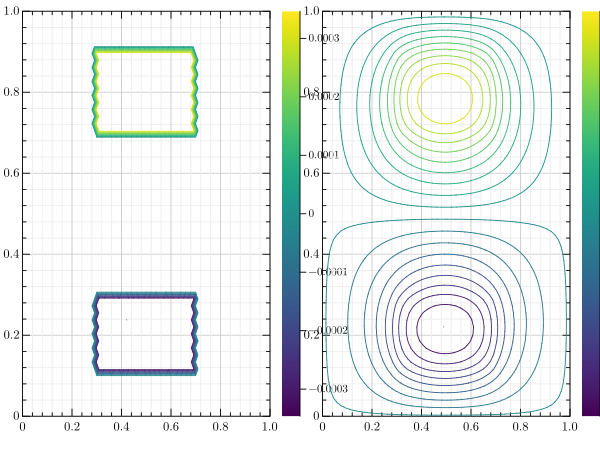

In [7]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
#sourcefunction(x,y) = x+y
sourcefunction(x,y) = (x>0.3)*(x<0.7)*(y>0.7)*(y<0.9) - (x>0.3)*(x<0.7)*(y>0.1)*(y<0.3) 
fvalues = map(sourcefunction, xnode, ynode)

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end

  #....compute local vector contribution floc of the current element
  floc = area_id/3*[fvalues[node1_id]; fvalues[node2_id]; fvalues[node3_id]]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);
  Mloc = area_id/3*[1 0 0; 0 1 0; 0 0 1]; 
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  I = element_connectivity[1][3*(element_id-1)+1:3*(element_id-1)+3]
  f[I] += floc  
  A[I,I] += Aloc
  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1=[]; node_ids2=[]; node_ids3=[]; node_ids4=[]; 
node_ids5=[]; node_ids6=[]; node_ids7=[]; node_ids8=[]; 
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,1)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,2)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,3)
node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,4)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..9/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/11 Plot the source term and the numerical solution
GR.subplot(1,2,1)
p1 = GR.tricont(xnode,ynode,f)
GR.subplot(1,2,2)
p1 = GR.tricont(xnode,ynode,u)

## Section 4:/ Solving the Scalar Diffusion Equation in Time Domain 

### Defining the Problem 

In [8]:
# set time interval and time step 
t0 = 0.0
tf = 4*0.02
Nt = 4*100 
dt = (tf - t0)/Nt 
# Vector t holds 0 and is Nt+1 long 
tvec = Vector(t0:dt:Nt*dt)

#..define the right-hand side of the ordinary differential equation of the equation of motion 
function scalarDiffusionEquation!(du,u,p,t)
    du[:] = M \ (sin(2*π*50*t)*f - A*u)
end

#..set initial position and velocity
u0 = fill(0.,nnodes)
                                    
#..set time begin and end forward
tspan = (t0,tf)

#..define ODE problem to be solved  
prob_scalarDiffusion = ODEProblem(scalarDiffusionEquation!, u0, tspan, Tsit5(), 
                                  reltol = 1e-8, abstol = 1e-8)

#..solve ODE problem 
sol = DifferentialEquations.solve(prob_scalarDiffusion);

#..interpolate solution in desired time samples
U = zeros(nnodes,length(tvec))
for k=1:length(tvec) 
  U[:,k] = sol(tvec[k])
end

In [9]:
b = sin.(2*π*50*tvec)
B = [[tvec[k]/tf, b[k]] for k=1:length(tvec)]
display(B[26])
display(B[51])
display(B[76])

2-element Vector{Float64}:
 0.0625
 1.0

2-element Vector{Float64}:
 0.125
 1.2246467991473532e-16

2-element Vector{Float64}:
  0.1875
 -1.0

In [ ]:
anim = @animate for i in t0:tf
    Plots.surface(xnode,ynode,sol(i/10),st=:surface)
    zlims!(-.2, 1.5)
end
gif(anim, "my-animation.gif", fps = 1)

### Plotting the computed solution 

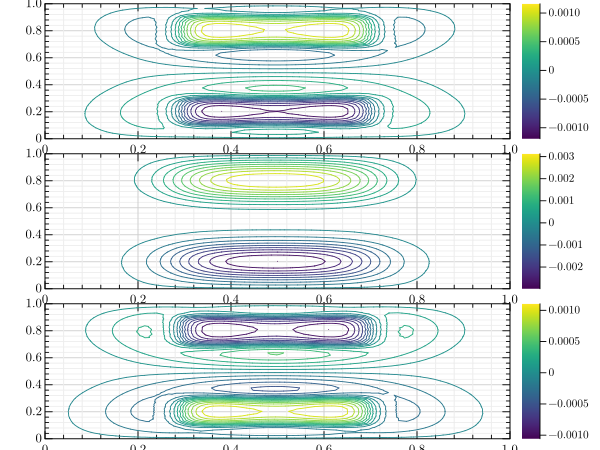

In [10]:
GR.subplot(3,1,1)
p1 = GR.tricont(xnode,ynode,U[:,326])
GR.subplot(3,1,2)
p1 = GR.tricont(xnode,ynode,U[:,351])
GR.subplot(3,1,3)
p1 = GR.tricont(xnode,ynode,U[:,376])